This lesson is all about a deep learning
technique called convolution. Among its
uses, convolution has become the standard
method for classifying, manipulating, and generating images. Convolution is easy to use in deep
learning because it can be easily encapsulated in a ­convolution layer (also called a convolutional layer). In
this lesson, we look at the key ideas behind convolution and the related techniques we use to make convolution work in practice. We will see how to arrange
a series of these operations to create a hierarchy of
operations, which turns a series of simple operations
into a powerful tool.

In order to stay specific, in this lesson we focus our discussion of convolution on working with images. Models that use convolution have been
spectacularly successful in this domain. For example, they excel at basic
classification tasks like determining **if an image is a leopard or a cheetah**,
**or a planet or a marble. We can recognize the people in a photograph**
(Sun, Wang, and Tang 2014); **detect and classify different types of skin**
cancers (Esteva et al. 2017); **repair image damage like dust, scratches, and**
**blur** (Mao, Shen, and Yang 2016); **and classify people’s age and gender**
**from their photos**(Levi and Hassner 2015). Convolution-based networks
are also useful in many other applications, such as natural language processing (Britz 2015), **where we can work out the structure of sentences**
(Kalchbrenner, Grefenstette, and Blunsom 2014) or **classify sentences into**
**different categories** (Kim 2014).

# **Introducing Convolution**

In deep learning, images are 3D tensors, with a height, width, and number
of channels, or values per pixel. A grayscale image has only one value per
pixel, and thus only one channel. A color image stored as RGB has three
channels (with values for red, green, and blue). Sometimes people use
the terms depth or fiber size to refer to the number of channels in a tensor.
Unfortunately, depth is also used to refer to the number of layers in a deep
network, and fiber size has not caught on widely. To avoid confusion, we
always refer to the three dimensions of an image (and related 3D tensors)
as height, width, and channels. Using our deep learning terminology, each
image we provide to the network for processing is a sample. Each pixel in
an image is a feature.

When a tensor moves through a series of convolution layers, it often
changes in width, height, and number of channels. If a tensor happens to
have 1 or 3 channels, we can think of it as an image. But if a tensor has,
say, 14 or 512 channels, it’s probably best not to think of it as an image any
more. This suggests that we shouldn’t refer to individual elements of the
tensor as pixels, which is an image-centric term. Instead, we call them elements. Figure 16-1 shows these terms visually.

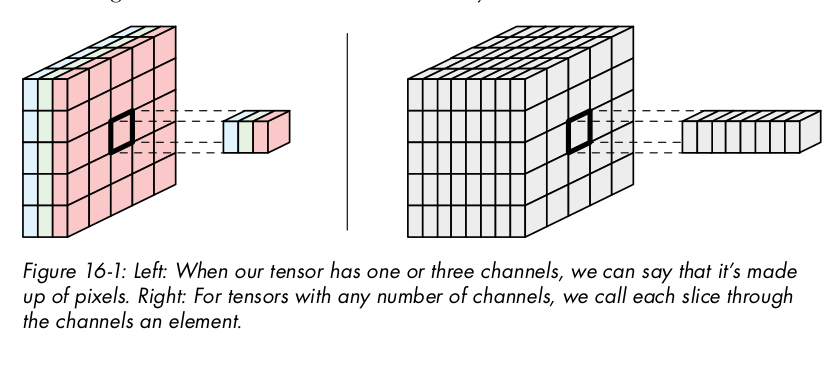

**A network in which the convolution layers play a central role is usually**
**called a convolutional neural network, convnet, or CNN. Sometimes people also**
**say CNN network** (an example of “redundant acronym syndrome syndrome”
[Memmott 2015]).

## **Detecting Yellow**

To kick off our discussion of convolution, let’s consider processing a color
image. Each pixel contains three numbers: one each for red, green, and
blue. Suppose we want to create a grayscale output that has the same height
and width as our color image, but where the amount of white in each pixel
corresponds to the amount of yellow in its input pixel.

For simplicity, let’s assume our RGB values are numbers from 0 to
1 . Then a pixel that’s pure yellow has red and green values of 1, and a
blue value of 0. As the red and green values decrease, or the blue value
increases, the pixel’s color shifts away from yellow.

We want to combine each input pixel’s RGB values into a single number
from 0 to 1 that represents “yellowness,” which is the output pixel’s value.
Figure 16-2 shows one way to do this.

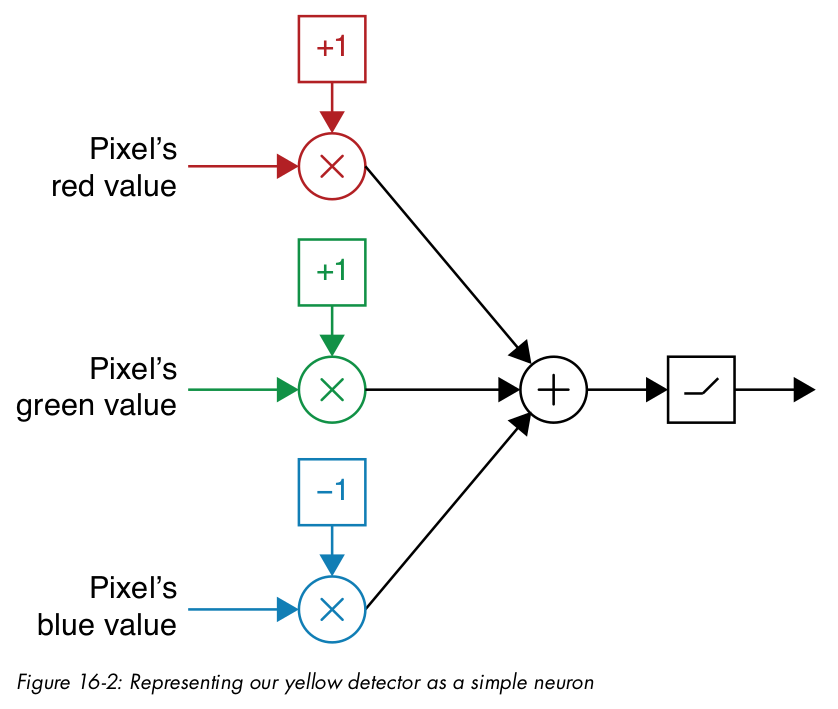

This sure looks familiar. It has the same structure as an artificial neuron. When we interpret Figure 16-2 as a neuron, +1, +1, and −1 are the three
weights, and the numbers associated with the color values are the three
inputs. Figure 16-3 shows how to apply this neuron to any pixel in an image.

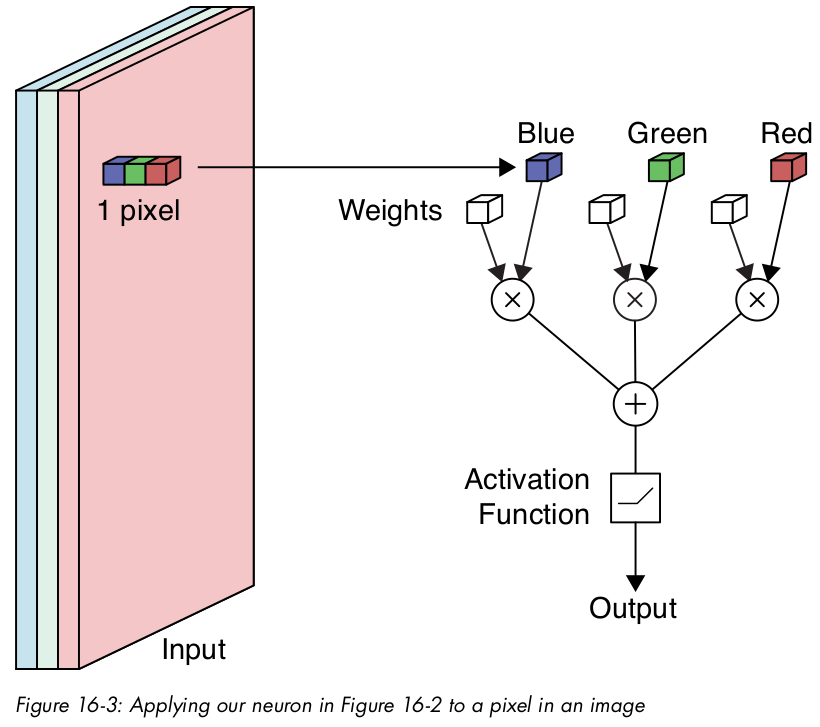

We can apply this operation to every pixel in the input, creating a single
output value for every pixel. The result is a new tensor with the same width
and height as the input, but only one channel, as shown in Figure 16-4.

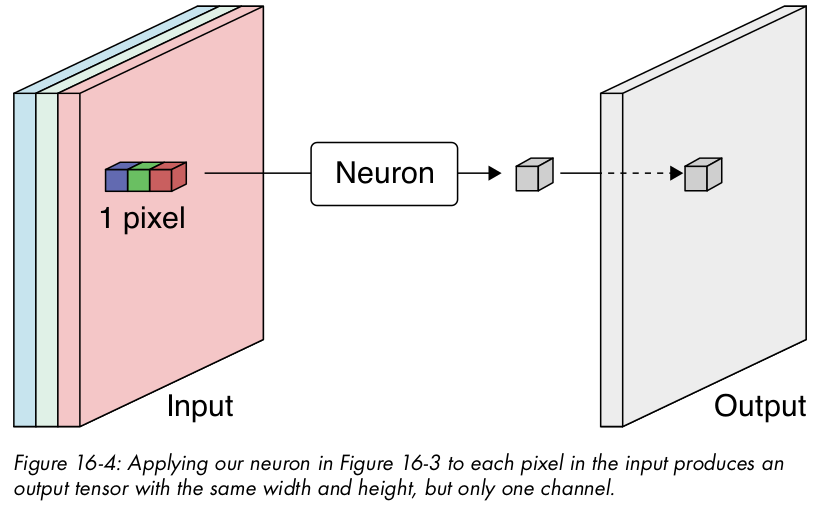

We often imagine applying the neuron to the upper-left pixel, then
moving it one step at a time to the right until we reach the end of the row,
then repeating this for the next row, and the next, until we reach the bottom right pixel. We say that we’re sweeping the neuron over the input, or
scanning the input.

Figure 16-5 shows the result of this process on a picture of a yellow frog.
As we intended, the more yellow that’s present in each input pixel, the more
white we see in its corresponding output. We say that the neuron is identifying or detecting yellow in the input.

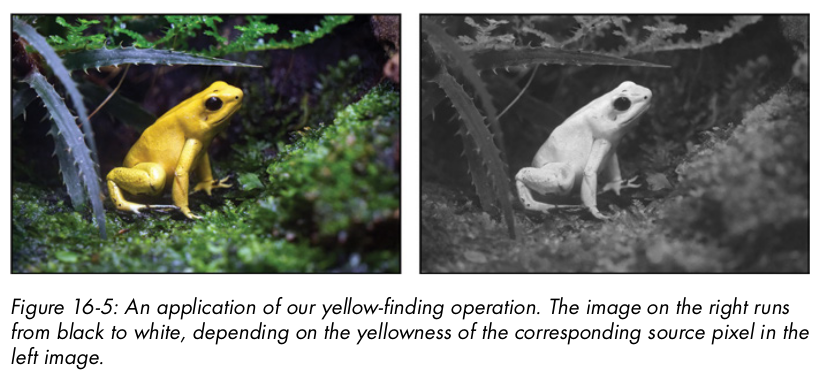

Of course there’s nothing special about yellow. We can build a little
neuron to detect any color. When we use a neuron in this way, we often say
that it is filtering the input. In this context, **the weights are sometimes collectively called the filter** values or just the filter. Inheriting language from their
mathematical roots, the weights are also called the filter kernel or just the
kernel. It’s also common to refer to the entire neuron as a filter. Whether the
word filter refers to a neuron, or specifically to its weights, is usually clear
from context.

This operation of sweeping the filter over the input corresponds to a
mathematical operation called convolution (Oppenheim and Nawab 1996).
We say that the right side of Figure 16-5 is the result of convolution of the
color image with the yellow-detecting filter. We also say that we convolve the
image with the filter. Sometimes we combine these terms and refer to a filter (whether an entire neuron, or just its weights) as a convolution filter.

## **Weight Sharing**

In the last section, we imagined sweeping our neuron over the input image,
performing exactly the same operation at every pixel. If we want to go
faster, we can create a huge grid of identical neurons and apply them to all
the pixels simultaneously. In other words, we process the pixels in parallel.
In this approach, every neuron has identical weights. Rather than
repeating the same weights in a separate piece of memory for every neuron,
we can imagine that the weights are stored in some shared piece of memory, as in Figure 16-6. We say that the neurons are weight sharing.

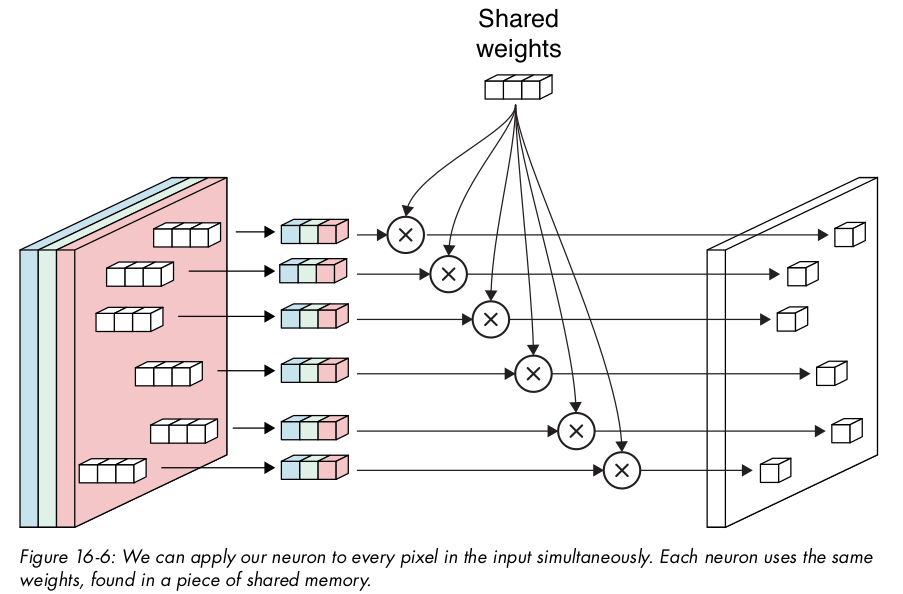

This lets us save on memory. In our yellow detector example, weight
sharing also makes it easy to change the color we’re detecting. Rather than
change the weights in thousands of neurons (or more), we just change the
one set in the shared memory.


We can actually implement this scheme on a GPU, which is capable of
performing many identical sequences of operations at once. Weight sharing
lets us save on precious GPU memory, freeing it up for other uses.

## **Larger Filters**

So far, we’ve been sweeping our neuron over the image (or applying it in
parallel using weight sharing), processing one pixel at a time, using only
that pixel’s values for input. In many situations, it’s also useful to look at
the pixels near the one we’re processing. Usually we consider a pixel’s eight
immediate neighbors. That is, we use the values in a little three by three box
that’s centered on the pixel.

Figure 16-7 shows three different operations we can apply using a three
by three block of numbers in this way: blurring, detecting horizontal edges,
and detecting vertical edges.


To compute each image, we center the block of weights over each pixel
in turn and multiply each of the nine values under it by the corresponding
weight. We add up the results and use their sum as the output value for that
pixel. Let’s see how to implement this process with a neuron.

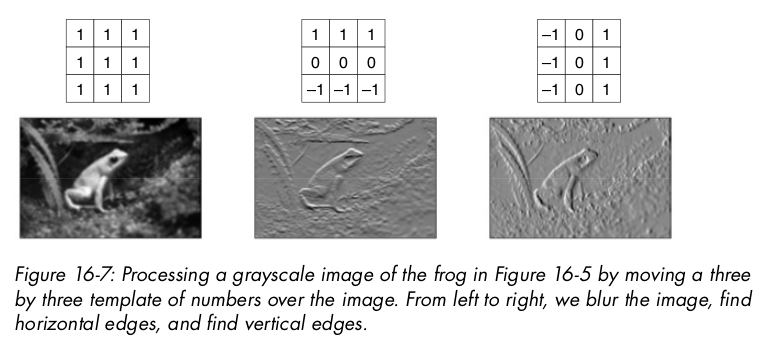

For simplicity, we’ll stick with a grayscale input for now. We can think
of the blocks of numbers in Figure 16-7 as weights, or filter kernels. In this
scenario, we have a grid of nine weights that we place over a grid of nine
pixel values. Each pixel value is multiplied by its corresponding weight, the
results are summed up and run through an activation function, and we
have our output. Figure 16-8 shows the idea.

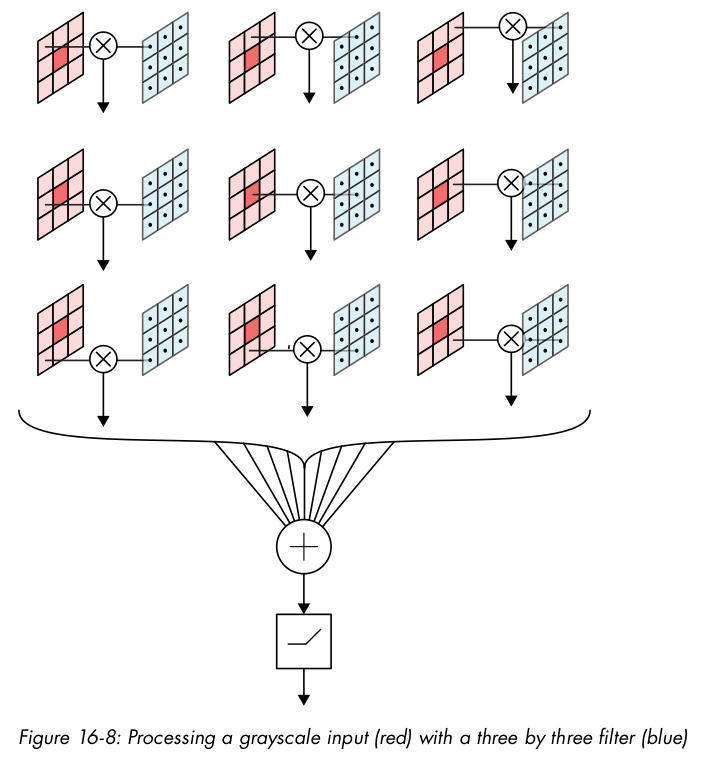

This figure shows how to process a single pixel (shown in dark red).
We center the filter over the intended pixel and multiply each of the nine
values in the input with its corresponding filter value. We add up all nine
results and pass that sum through an activation function.

The shape of the pixels that form a neuron’s input in this scheme is called
that neuron’s local receptive field, or more simply its footprint. In Figure 16-8, the
neuron’s footprint is a square, three pixels on a side. In our yellow detector,
the footprint was a single pixel. When a filter’s footprint is larger than a single
pixel, we sometimes emphasize that quality by calling a spatial filter.

Note that the neuron in Figure 16-8 is just like any other neuron. It
receives nine numbers as inputs, multiplies each one by its corresponding
weight, adds the results together, and passes that number through an activa-
tion function. It doesn’t know or care that these nine numbers are coming
from a square region of the input, or even that they’re coming from an image.

We apply this three by three filter to an image by convolving it with
the image, just as before, by sweeping it over each pixel in turn. For each
input pixel, we imagine centering the three by three grid of weights over
that pixel, applying the neuron, and creating a single output value, as in
Figure 16-9. We say that the pixel we’re centering the filter over is the anchor
(or the reference point or zero point).

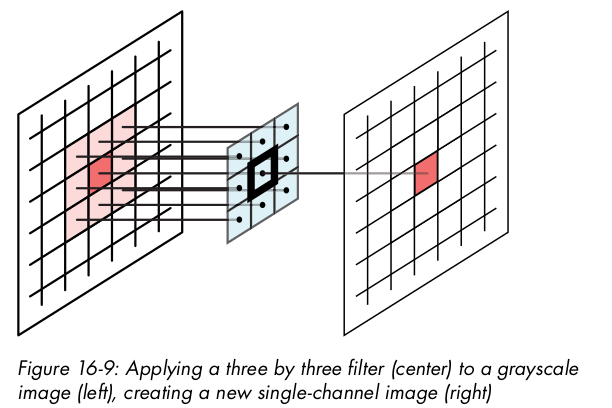

We can design our filters to have footprints of any size and shape we
like. In practice, small sizes are most common, since they are faster to evalu-
ate than larger footprints. We usually use small squares with an odd num-
ber of pixels on each side (often between one and nine). Such squares let us
place the anchor in the center of the footprint. This keeps everything sym-
metrical and easier to understand.

Let’s put this into practice. Figure 16-10 shows the result of convolving a
seven by seven input with a three by three filter. Note that if we were to cen-
ter the filter over the input’s corners or edges, the filter’s footprint would
extend beyond the input, and the neuron would require input values that
aren’t present. We address this a little later. For now, let’s just limit ourselves to those locations where the filter sits entirely on top of the image. That
means that the output image is only five by five.

We motivated our discussion by looking at spatial filters that can do
things like blur an image or detect edges. But why are such things useful for
deep learning? To answer this, let’s look at filters more closely.

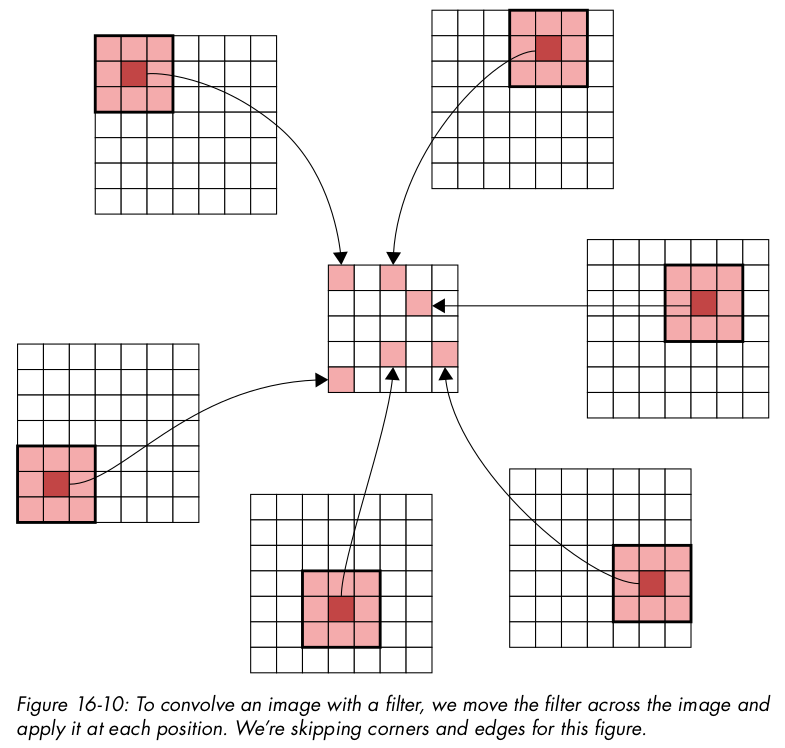

## **Filters and Features**

Some biologists who study toads think that certain cells in the animal’s
visual system are sensitive to specific types of visual patterns (Ewert et al.
1985). The theory is that a toad is looking for particular shapes corresponding to the creatures it likes to eat and to certain motions that those animals
make. People used to think that a toad’s eyes absorbed all the light that
struck them, sent that mass of information to the brain, and it was the
brain’s job to sift among the results looking for food. The new hypothesis is
that the cells in the eye are doing some early steps in this detection process
(such as finding edges) all by themselves, and they only fire and pass on
information to the brain if they “think” they’re looking at prey.

The theory has been extended to the human visual system, where it
has led to the surprising hypothesis that some individual neurons are so
precisely fine-tuned that they only fire in response to pictures of specific people. The original study that led to this suggestion showed people 87 dif-
ferent images, including people, animals, and landmarks. In one volunteer
they found a specific neuron that only fired when the volunteer was shown a
photo of the actress Jennifer Aniston (Quiroga 2005). Even more curiously,
that neuron only fired when Aniston was alone, and not when she was pictured together with other people, including famous actors.

The idea that our neurons are precision pattern-matching devices is
not universally accepted, but we’re not doing real neuroscience and biology
here. We’re just looking for inspiration. And this idea of letting neurons
perform detection work seems like some pretty great inspiration.

The connection to convolution is that we can use filters to simulate the
cells in the toad’s eyes. Our filters also pick out specific patterns and then
pass on their discoveries to later filters that look for even bigger patterns.
Some of the terminology we use for this process echoes terms that we’ve
seen before. Specifically, we’ve been using the word feature to refer to one of
the values contained in a sample. But in this context, the word feature also
refers to a particular structure in an input that the filter is trying to detect,
like an edge, a feather, or scaly skin. We say that a filter is looking for a stripe
feature, or eyeglasses, or a sports car. Continuing this usage, the filters
themselves are sometimes called feature detectors. When a feature detector
has been swept over an entire input, we say that its output is a feature map
(the word map in this context comes from mathematical language). The
feature map tells us, pixel by pixel, how well the image around that pixel
matched what the filter was looking for.

Let’s see how feature detection works. In Figure 16-11 we show the process
of using a filter to find short, isolated vertical white stripes in a binary image.

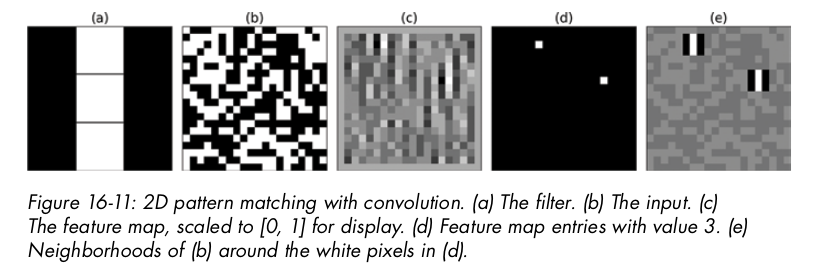

Figure 16-11(a) shows a three by three filter with values −1 (black) and 1
(white). Figure 16-11(b) shows a noisy input image, consisting only of black
and white pixels. Figure 16-11(c) shows the result of applying the filter to
each pixel in the input image (except for the outermost border). Here the
values range from −6 to +3, which we scaled to [0, 1] for display. The larger
the value in this image, the better the match between the filter and the
pixel (and its neighborhood). A value of +3 means the filter matched the
image perfectly at that pixel.

Figure 16-11(d) shows a thresholded version of Figure 16-11(c), where
pixels with a value of +3 are shown in white, and all others are black. Finally,
Figure 16-11(e) shows the noisy image of Figure 16-11(b) with the three by three grid of pixels around the white pixels in Figure 16-11(d) highlighted.
We can see that the filter found those places in the image where the pixels
matched the filter’s pattern.

Let’s see why this worked. In the top row of Figure 16-12 we show our
filter and a three by three patch of the image, along with the pixel-by-pixel
results.

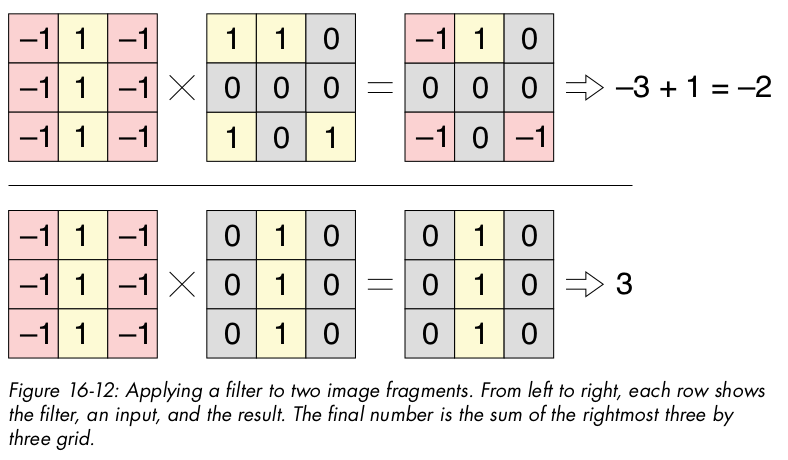

Consider the pixels shown in the middle of the top row. The black
pixels (shown in gray here), with a value of 0, don’t contribute to the out-
put. The white pixels (shown in light yellow here), with a value of 1, get
multiplied by either 1 or –1, depending on the filter value. In the top row
of pixels, only one of the white pixels (the top center) is matched by a 1 in
the filter. This gives a result of 1 × 1 = 1. The other three white pixels are
matched up with −1, giving three results of −1 × 1 = −1. Adding these gives
us −3 + 1 = −2.

In the lower row, our image matches the filter. All three weights of 1
on the filter are sitting on white pixels, and there are no other white pixels
in the input. The result is a score of 3, indicating a perfect match.

Figure 16-13 shows another filter, this time looking for diagonals. Let’s
run it over the same image. This diagonal of three white pixels surrounded
by black is present in two places

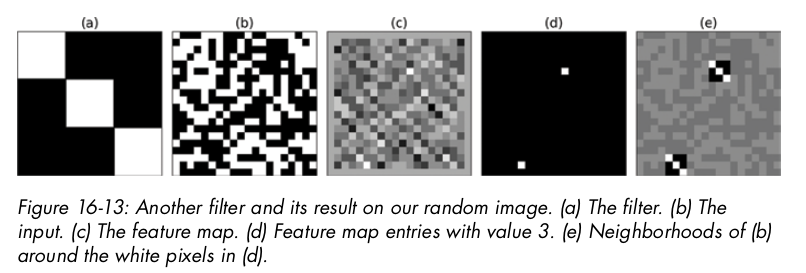

By sweeping a filter over the image and computing the output value at
each pixel, we can hunt for lots of different simple patterns. In practice, our
filter and pixel values are all real numbers (not just 0 and 1), so we can make
much more complex patterns that find more complex features (Snavely 2013).

If we take the output of a set of filters and feed them to another set of
filters, we can look for patterns of patterns. If we feed that second set of
outputs to a third set of filters, we can look for patterns of patterns of pat-
terns. This process lets us build up from, say, a collection of edges, to a set
of shapes, such as ovals and rectangles, to ultimately matching a pattern
corresponding to some specific object, such as a guitar or bicycle.

Applying successive groups of filters in this way, in concert with another
technique we will soon discuss called pooling, enormously expands the sorts
of patterns that we can detect. The reason is that the filters operate hierar-
chically, where each filter’s patterns are combinations of the patterns found
by earlier filters. Such a hierarchy allows us to look for features of great
complexity, such as the face of a friend, the grain of a basketball, or the eye
on the end of a peacock’s feather.

If we had to work out these filters by hand, classifying images would be
impractical. What are the proper weights in a chain of eight filters that tell
us if a picture shows a kitten or an airplane? How could we even go about
working out that problem? And how would we know when we found the best
filters? In Chapter 1 we discussed expert systems, in which people tried to
do this kind of feature engineering by hand. It’s a formidable task for simple
problems, and it grows in complexity so quickly that really interesting prob-
lems, such as distinguishing cats from airplanes, seem entirely out of reach.

The beauty of CNNs is that they carry out the goals of expert systems,
but we don’t have to figure out the values of the filters by hand. The learn-
ing process that we’ve seen in previous chapters, involving measuring error,
backpropagating the gradients, and then improving the weights, teaches a
CNN to find the filters it needs. The learning process modifies the kernel of
each filter (that is, the weights in each neuron), until the network is produc-
ing results that match our targets. In other words, training tunes the values
in the filters until they find the features that enable it to come up with the
right class for the object in the image. And this can happen for hundreds or
even thousands of filters, all at once.

This can seem like magic. Starting with random numbers, the system
learns what patterns it needs to look for in order to distinguish a piano
from an apricot from an elephant, and then it learns what numbers to put
into the filter kernels in order to find those patterns.

That this process can even come close in one situation is remarkable.
The fact that it often produces highly accurate results in a vast range of
applications is one of the great discoveries in deep learning.

## **Padding**

Earlier, we promised to return to the issue of what happens when a convolution filter is centered over an element in a corner or on an edge of an input
tensor. Let’s look at that now.

Suppose that we want to apply a 5 by 5 filter to a 10 by 10 input. If we’re
somewhere in the middle of the tensor, as in Figure 16-14, then our job is
easy. We pull out the 25 values from the input, and apply them to the convo-
lution filter.

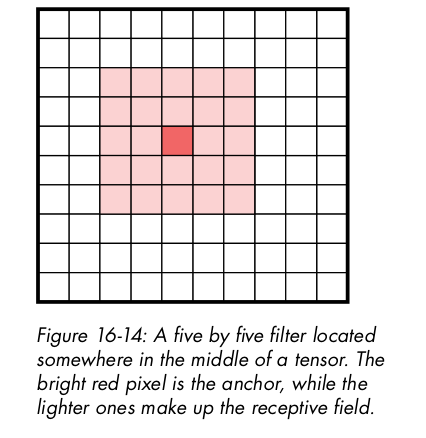

But what if we’re on, or near, an edge, as in Figure 16-15?

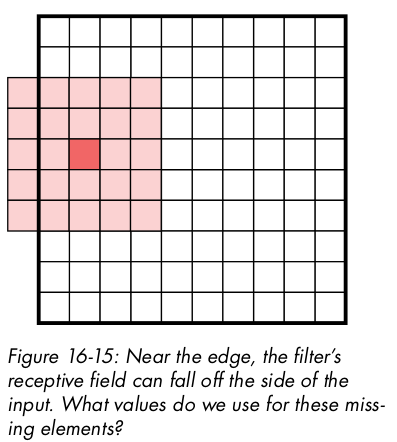

The footprint of the filter is hanging off the edge of the input. There
aren’t any input elements there. How do we compute an output value for
the filter when it’s missing some of its inputs?

We have a few choices. One is to disallow this case so we can only place
the footprint where it is entirely within the input image. The result is an
output that’s smaller in height and width. Figure 16-16 shows this idea.

While simple, this is a lousy solution. We said that we often apply many
filters in sequence. If we sacrificed one or more rings of elements each time,
we would lose information with every step we take through the network.

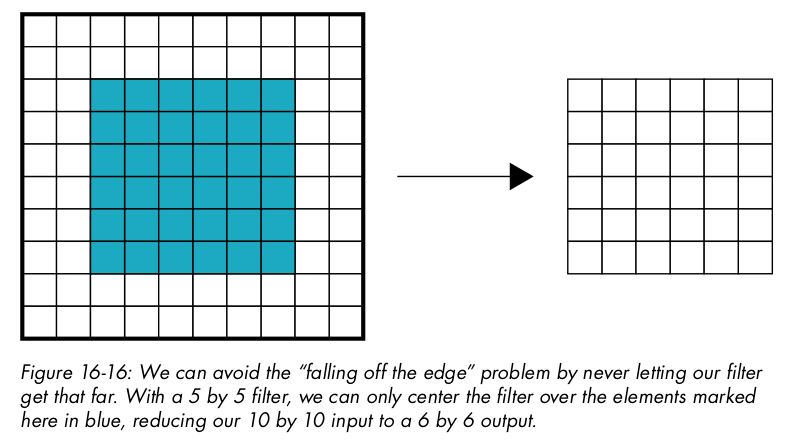

A popular alternative is to use a technique called padding, which lets us
create an output image of the same width and height as the input. The idea
is that we add a border of extra elements around the outside of the input, as
in Figure 16-17. All of these elements have the same value. If we place zeros
in all the new elements, we call the technique zero-padding. In practice, we
almost always use zeros, so people often refer to zero-padding as merely
padding, with the understanding that if they mean to use any value other
than zero, they say so explicitly.

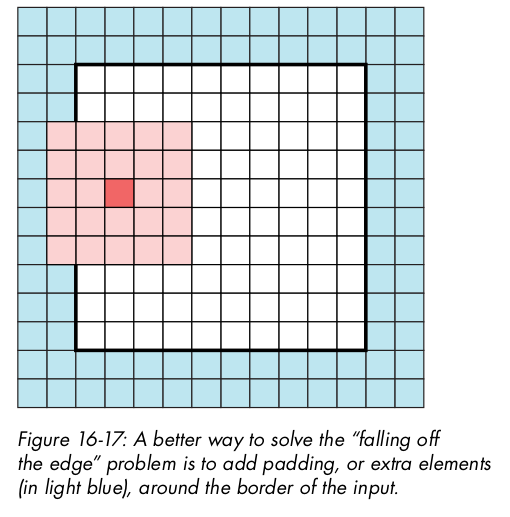

The thickness of the border depends on the size of the filter. We usually
use just enough padding so that the filter can be centered on every element
of the input. Every filter needs to have its input padded if we don’t want to
lose information from the sides.

Most deep learning libraries automatically calculate the necessary
amount of padding so that our output has the same width and height as our
input, and apply it for us as a default.

# **Multidimensional Convolution**

So far in this chapter, we’ve mostly been considering grayscale images
with only one channel of color information. We know that most color
images have three channels, representing the red, green, and blue compo-
nents of each pixel. Let’s see how to handle those. Once we can work with
images with three channels, we can work with tensors of any number of
channels.

To process an input with multiple channels, our filters (which can
have any footprint) need to have an identical number of channels. That’s
because each value in the input needs to have a corresponding value in the
filter. For an RGB image, a filter needs three channels. So, a filter with a
footprint of three by three needs to have three channels, for a total of 27
numbers, as shown in Figure 16-18.

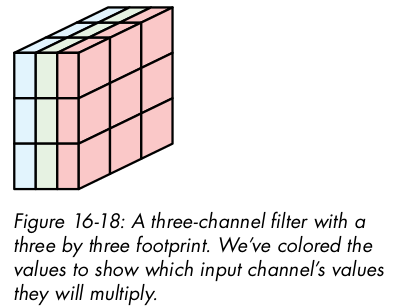

To apply this kernel to a three-channel color image, we proceed
much as before, but now we think in terms of blocks (or tensors of three
dimensions).

Let’s take the filter of Figure 16-18, with a three by three footprint and
three channels, and use it to process an RGB image with three color chan-
nels. For each input pixel, we center the filter’s footprint over that pixel
as before, and match up each of the 27 numbers in the image with the 27
numbers in the filter, as in Figure 16-19.

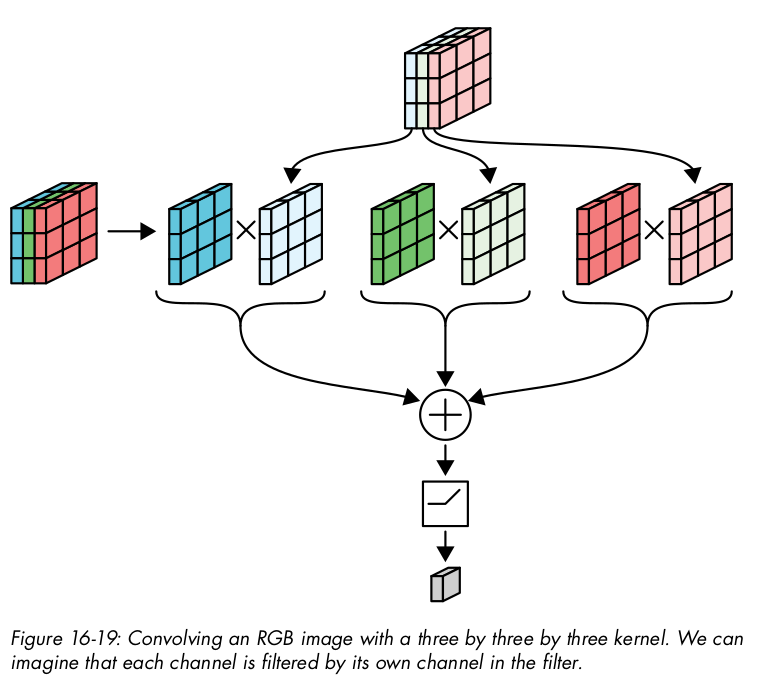

In Figure 16-19, our input has three channels, so our filter has
three channels as well. It may be helpful to think of the red, green, and
blue channels as each getting filtered by their corresponding channel in
the filter, as shown in Figure 16-19. In practice, we treat the input and the
filter as three by three by three blocks, and each of the 27 input values get
multiplied with its corresponding filter value.

This idea generalizes to any number of channels. In order to make sure
that every input value has a corresponding filter value, we can state the nec-
essary property as a rule: every filter must have the same number of chan-
nels as the tensor it’s filtering.

# **Multiple Filters**

We’ve been applying a single filter at a time, but that’s rare in practice.
Usually we bundle up tens or hundreds of filters into one convolution layer
and apply them all simultaneously (and independently) to that layer’s input.

To see the general picture, imagine that we’ve been given a black-and-
white image, and we want to look for several low-level features in the pixels,
such as vertical stripes, horizontal stripes, isolated dots, and plus signs. We
can create one filter for each of these features and run each one over the
input independently. Each filter produces an output image with one chan-
nel. Combining the four outputs gives us one tensor with four channels.
Figure 16-20 shows the idea.

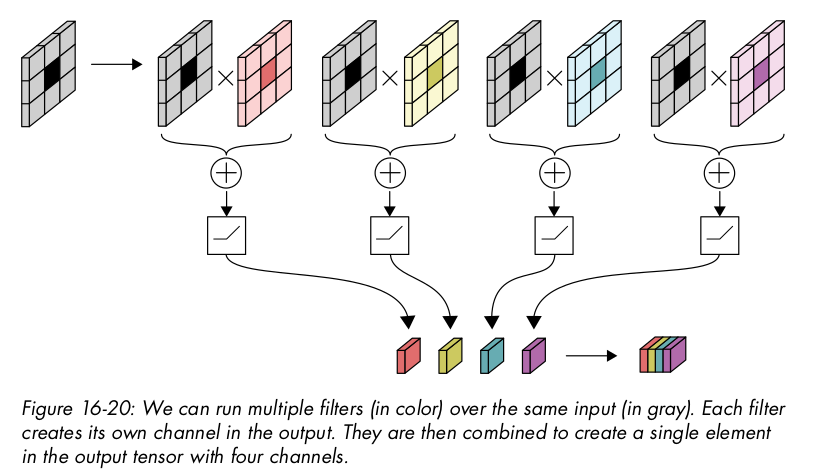

Instead of a grayscale image with one channel, or a color image with
three channels, we now have an output tensor with four channels. If we
used seven filters, then the output is a new image with seven channels. The
key thing to note here is that the output tensor has one channel for each
filter that’s applied.

Generally speaking, our filters can have any footprint, and we can apply
as many of them as we like to any input image. Figure 16-21 shows this idea.

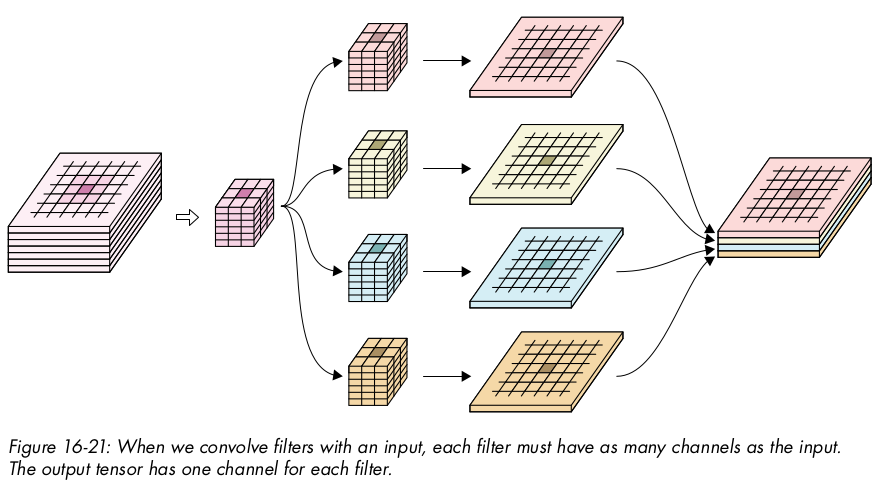

The input tensor at the far left has seven channels. We’re applying
four different filters, each with a three by three footprint, so each filter is a tensor of size three by three by seven. The output of each filter is a feature
map of a single channel. The output tensor is what we get from stacking
these four feature maps, so it has four channels.

Although in principle each filter we apply can have a different foot-
print, in practice we almost always use the same footprint for every filter in
any given convolution layer. For example, in Figure 16-21 all the filters have
a footprint of three by three.

Let’s gather together the two numerical rules from the previous section
and this one. First, every filter in a convolution layer must have the same
number of channels as that layer’s input tensor. Second, a convolution lay-
er’s output tensor will have as many channels as there are filters in the layer.

# **Convolution Layers**

Let’s take a closer look at the mechanics of convolution layers. A convolution layer is simply a bunch of filters gathered together. They’re applied
independently to the input tensor, as in Figure 16-21, and their outputs are
combined to create a new output tensor. The input is not changed by this
process.

When we create a convolution layer in code, we typically tell our
library how many filters we want, what their footprint should be, and other
optional details like whether we want to use padding and what activation
function we want to use—the library takes care of all the rest. Most impor-
tantly, training improves the kernel values in each filter, so that the filters
learn the values that enable them to produce the best results.

When we draw a diagram of a deep learner, we usually label our convolution layers with how many filters are used, their footprints, and their activation function. Since it’s common to use the same padding all around the
input, we often just provide a single value rather than two, with the understanding that it applies to both width and height.

Like the weights in fully connected layers, the values in a convolution
layer’s filters start out with random values and are improved with training. Also like fully connected layers, if we’re careful about choosing these
random initial values, training usually goes faster. Most libraries offer a
variety of initialization methods. Generally speaking, the built-in defaults
normally work fine, and we rarely need to explicitly choose an initialization
algorithm.

If we do want to pick a method, the He algorithm is a good first choice
(He et al. 2015; Karpathy 2016). If that’s not available, or doesn’t work well in
a given situation, Glorot is a good second choice (Glorot and Bengio 2010).

Let’s look at a couple of special types of convolution that have their
own names.

## **1D Convolution**

An interesting special case of sweeping a filter over an input is called
1D convolution. Here we sweep over the input as usual in either height or
width, but not the other (Snavely 2013). This is a popular technique when working with text, which can be represented as a grid where each element
holds a single letter, and rows contain complete words (or a fixed number
of letters) (Britz 2015).

The basic idea is shown in Figure 16-22.

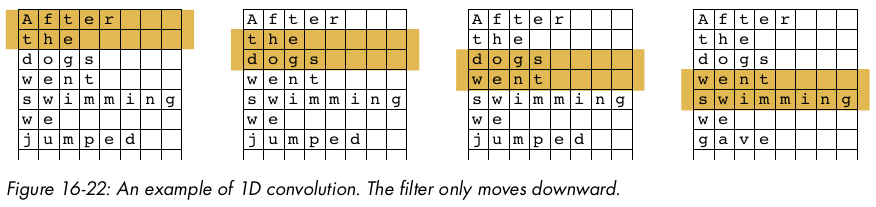

Here, we’ve created a filter that is the entire width of the input and two
rows high. The first application of the filter processes everything in the first
two rows. Then we move the filter down and process the next two rows. We
don’t move the filter horizontally. The name 1D convolution comes from this
single direction, or dimension, of movement.

As always, we can have multiple filters sliding down the grid. We can
perform 1D convolution on an input tensor of any number of dimensions,
as long as the filter itself moves in just one dimension. There’s nothing oth-
erwise special about 1D convolution: it’s just a filter that only moves in one
direction. The technique has its own name to emphasize the filter’s limited
mobility.

The name 1D convolution is almost the same as the name of another,
quite different, technique. Let’s look at that now.

## **1×1 Convolutions**

Sometimes we want to reduce the number of channels in a tensor as it flows
through a network. Often this is because we think that some of the channels contain redundant information. This isn’t uncommon. For example,
suppose we have a classifier that identifies the dominant object in a photograph. The classifier might have a dozen or more filters that look for eyes
of different sorts: human eyes, cat eyes, fish eyes, and so on. If our classifier
is going to ultimately lump all living things together into one class called
“­living things,” then there’s no need to care about which kind of eye we
find. It’s enough just to know that a particular region in the input image
has an eye.

Suppose that we have a layer containing filters that detect 12 different
kinds of eyes. Then the output tensor from that layer will have at least 12
channels, one from each filter. If we only care about whether or not an eye
is found, then it would be useful to modify that tensor by combining, or
compressing, those 12 channels into just 1 channel representing whether or
not an eye is found at each location.

This doesn’t require anything new. We want to process one input ele-
ment at a time, so we create a filter with a footprint of one by one, like we
saw in Figure 16-6. We make sure that we have at least 11 fewer filters than there are input channels. The result is a tensor of the same width and
height as the input, but the multiple eye channels get crunched together
into just one channel.

We don’t have to do anything explicit to make this happen. The net-
work learns weights for the filters such that the network produces the cor-
rect output for each input. If that means combining all the channels for
eyes, then the network learns to do that.

Figure 16-23 shows how to use these filters to compress a tensor with
300 channels into a new tensor of the same width and height, but with only
175 channels.

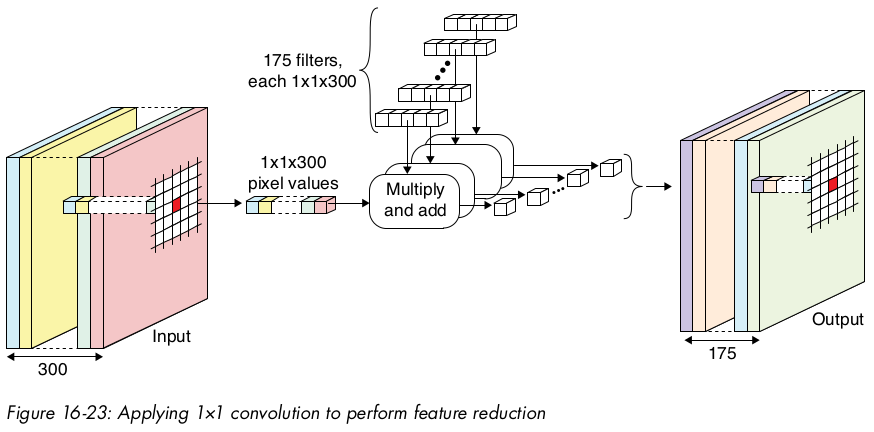

The technique of using one by one filters has been given its own name.
We say that we apply a one by one filter, often written as a 1×1 filter, and use
that to perform 1×1 convolution (Lin, Chen, and Yan 2014).

In last Leasson we talked about the value of preprocessing our input
data in order to save processing time and memory. Rather than perform
this processing once, before the data has entered our system, 1×1 convolution lets us apply this compression and restructuring of the data on the fly,
inside of the network. If our network produces information that can be
compressed or removed entirely, then 1×1 convolutions can find and then
compress or remove that data. We can do this anywhere, even in the middle
of a network.

When the channels are correlated, 1×1 convolution is particularly effective (Canziani, Paszke, and Culurciello 2016; Culurciello 2017). This means
that the filters on the previous layers have created results that are in sync
with one another, so that when one goes up, we can predict by how much
the others will go up or down. The better this correlation, the more likely
it is that we can remove some of the channels and suffer little to no loss of
information. The 1×1 filters are perfect for this job.

The term 1×1 convolution is uncomfortably close to 1D convolution, which
we discussed in the last section. But these names refer to quite distinct
techniques. When encountering either of these terms, it is worth taking a
moment to make sure we have the correct idea in mind.